In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, '../crowdtas')

from workers.utility_funs import *
from workers.value_funs import *

from visual.visualization import plot_all_worker_funs
from environment_manager import generate_workers

rng = np.random.default_rng(500)

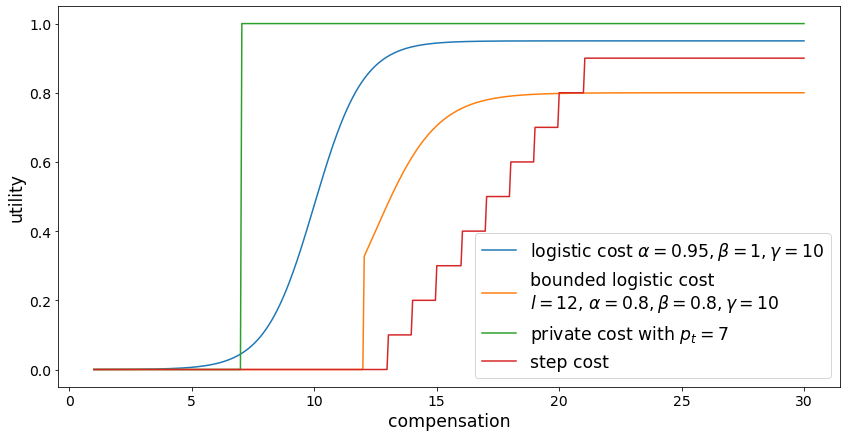

In [3]:
X = np.linspace(1, 30, num=500)
alpha_lc = 0.95; beta_lc = 1; gamma_lc = 10
min_bound_blc = 12; alpha_blc = 0.8; beta_blc = 0.8; gamma_blc = 10
min_bound_pc = 7; max_bound_pc = 7

u_lc = u_logistic_cost(alpha_lc, beta_lc, gamma_lc)
u_blc = u_bounded_logistic_cost(min_bound_blc, alpha_blc, beta_blc, gamma_blc)
u_pc = u_fixed_private_cost(min_bound_pc, max_bound_pc)

steps = np.column_stack((np.arange(13, 23), np.arange(0.0, 1.0, 0.1)))
u_sc = u_step_cost(steps)
# u_sh = u_spammer_hammer(alpha=0.1)

plt.figure(figsize=(14, 7))

plt.plot(X, u_lc(X), label=fr'logistic cost $\alpha={alpha_lc}, \beta={beta_lc}, \gamma={gamma_lc}$')
plt.plot(X, u_blc(X), label=fr'bounded logistic cost' '\n' fr'$l={min_bound_blc}$, ' 
                             fr'$\alpha={alpha_blc}, \beta={beta_blc}, \gamma={gamma_blc}$')
plt.plot(X, u_pc(X), label=fr'private cost with $p_t = {min_bound_pc}$')
plt.plot(X, u_sc(X), label=fr'step cost')

# plt.plot(X, u_sh(X), label=fr'step cost')

plt.xlabel('compensation', fontsize='xx-large')
plt.ylabel('utility', fontsize='xx-large')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize='xx-large')
plt.show()

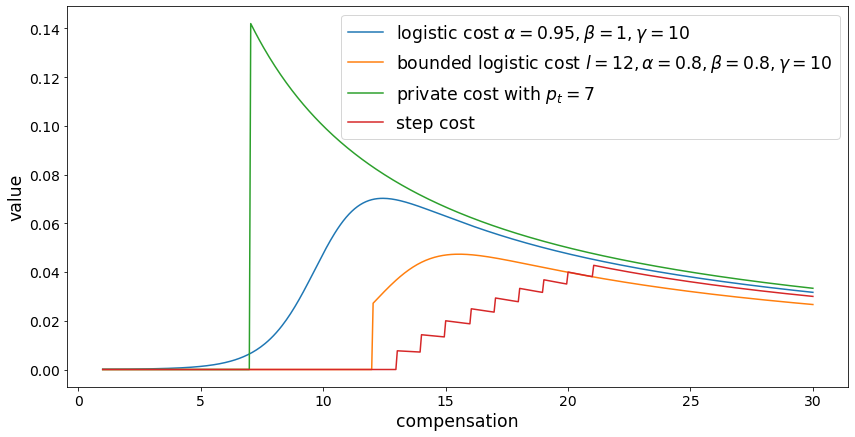

In [4]:
# X = np.linspace(1, 30, num=500)
# alpha_lc = 1; beta_lc = 1; gamma_lc = 7
# min_bound_blc = 12; alpha_blc = 1; beta_blc = 0.7; gamma_blc = 10
# min_bound_pc=5; max_bound_pc=5

v_lc = logistic_cost(alpha_lc, beta_lc, gamma_lc)
v_blc = bounded_logistic_cost(min_bound_blc, alpha_blc, beta_blc, gamma_blc)
v_pc = fixed_private_cost(min_bound_pc, max_bound_pc)
v_sc = step_cost(steps)


plt.figure(figsize=(14, 7))

plt.plot(X, v_lc(X), label=fr'logistic cost $\alpha={alpha_lc}, \beta={beta_lc}, \gamma={gamma_lc}$')
plt.plot(X, v_blc(X), label=fr'bounded logistic cost $l={min_bound_blc},' +
                             fr'\alpha={alpha_blc}, \beta={beta_blc}, \gamma={gamma_blc}$')
plt.plot(X, v_pc(X), label=fr'private cost with $p_t = {min_bound_pc}$')
plt.plot(X, v_sc(X), label=fr'step cost')

plt.xlabel('compensation', fontsize='xx-large')
plt.ylabel('value', fontsize='xx-large')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize='xx-large')
plt.show()

In [5]:
# Test
W = generate_workers(20, 20, funs=(bounded_logistic_cost, ), 
                         param_bounds=(((0.5, 29.5), (0.1, 10), (0.1, 1), (0.1, 25)), ))

--------------------------------------------------------------------------------
Finished generating 20 workers with 20 tasks!
--------------------------------------------------------------------------------


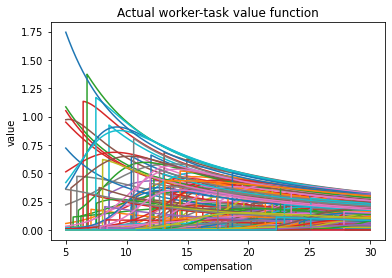

In [6]:
plot_all_worker_funs(W, (5, 30))